# Context

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
Content

The following Airbnb activity is included in this Seattle dataset:

    Listings, including full descriptions and average review score
    Reviews, including unique id for each reviewer and detailed comments
    Calendar, including listing id and the price and availability for that day

Inspiration

    Can you describe the vibe of each Seattle neighborhood using listing descriptions?
    What are the busiest times of the year to visit Seattle? By how much do prices spike?
    Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

For more ideas, visualizations of all Seattle datasets can be found here.
Acknowledgement

This dataset is part of Airbnb Inside, and the original source can be found here.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
print(os.listdir("seattle"))

['listings.csv', 'reviews.csv', 'calendar.csv']


In [3]:
df_c = pd.read_csv('seattle/calendar.csv')
df_l = pd.read_csv('seattle/listings.csv')
df_r = pd.read_csv('seattle/reviews.csv')

In [4]:
df_c.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
df_c.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [7]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
#Check whether is there any listing room who has two condition (available and non available) in the same day
dfcek = df_c.groupby(['date','listing_id']).count()
dfcek[dfcek['available']>1]

,,available,price
date,listing_id,,


In [9]:
# check whether is there any change of total quantity listing room in the sample period
df_c.groupby('date').count()

,listing_id,available,price
date,,,
2016-01-04,3818,3818,1735
2016-01-05,3818,3818,1867
2016-01-06,3818,3818,1826
2016-01-07,3818,3818,1776
2016-01-08,3818,3818,1782
...,...,...,...
2016-12-29,3818,3818,2835
2016-12-30,3818,3818,2840
2016-12-31,3818,3818,2859


In [10]:
df_c.listing_id.nunique()

3818

# Question 1: How was the pricing change by time in 2016?

In [11]:
# Convert "Price" datatype to numeric and remove Null value
dfc = df_c[df_c['price'].notna()]
dfc['price'] = dfc['price'].replace('[\$\,\.]', '', regex=True).astype(float)/100
dfc['date'] = pd.to_datetime(dfc['date'])
dfc['month'] = dfc['date'].dt.strftime('%b')
dfc['month_year'] = dfc['date'].dt.strftime('%b-%Y')

/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [12]:
dfc_2016 = dfc.loc[dfc['date'].dt.strftime('%Y') == "2016"]
dfc_2016

,listing_id,date,available,price,month,month_year
0,241032,2016-01-04,t,85.0,Jan,Jan-2016
1,241032,2016-01-05,t,85.0,Jan,Jan-2016
9,241032,2016-01-13,t,85.0,Jan,Jan-2016
10,241032,2016-01-14,t,85.0,Jan,Jan-2016
14,241032,2016-01-18,t,85.0,Jan,Jan-2016
...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0,Jan,Jan-2016
1393208,10208623,2016-01-07,t,87.0,Jan,Jan-2016
1393211,10208623,2016-01-10,t,87.0,Jan,Jan-2016
1393212,10208623,2016-01-11,t,87.0,Jan,Jan-2016


In [13]:
dfc_price = dfc_2016.groupby(['month']).agg({'price':['mean', 'median']}).reset_index()

In [14]:
dfc_price.columns = dfc_price.columns.droplevel(1)
dfc_price.columns = ['month', 'mean_price', 'median_price']
dfc_price

,month,mean_price,median_price
0,Apr,135.097005,110.0
1,Aug,150.656594,114.0
2,Dec,137.251835,109.0
3,Feb,124.293927,100.0
4,Jan,121.568409,99.0
5,Jul,152.094150,115.0
6,Jun,147.473137,110.0
7,Mar,128.644488,100.0
8,May,139.538183,110.0
9,Nov,135.688738,106.0


In [15]:
dfc_price['month_idx'] = pd.DatetimeIndex(pd.to_datetime(dfc_price['month'], format='%b')).month
dfc_price

,month,mean_price,median_price,month_idx
0,Apr,135.097005,110.0,4
1,Aug,150.656594,114.0,8
2,Dec,137.251835,109.0,12
3,Feb,124.293927,100.0,2
4,Jan,121.568409,99.0,1
5,Jul,152.094150,115.0,7
6,Jun,147.473137,110.0,6
7,Mar,128.644488,100.0,3
8,May,139.538183,110.0,5
9,Nov,135.688738,106.0,11


In [16]:
dfc_price = dfc_price.set_index('month_idx').sort_index()

In [17]:
dfc_price.reset_index()

,month_idx,month,mean_price,median_price
0,1,Jan,121.568409,99.0
1,2,Feb,124.293927,100.0
2,3,Mar,128.644488,100.0
3,4,Apr,135.097005,110.0
4,5,May,139.538183,110.0
5,6,Jun,147.473137,110.0
6,7,Jul,152.094150,115.0
7,8,Aug,150.656594,114.0
8,9,Sep,143.255949,110.0
9,10,Oct,137.031939,109.0


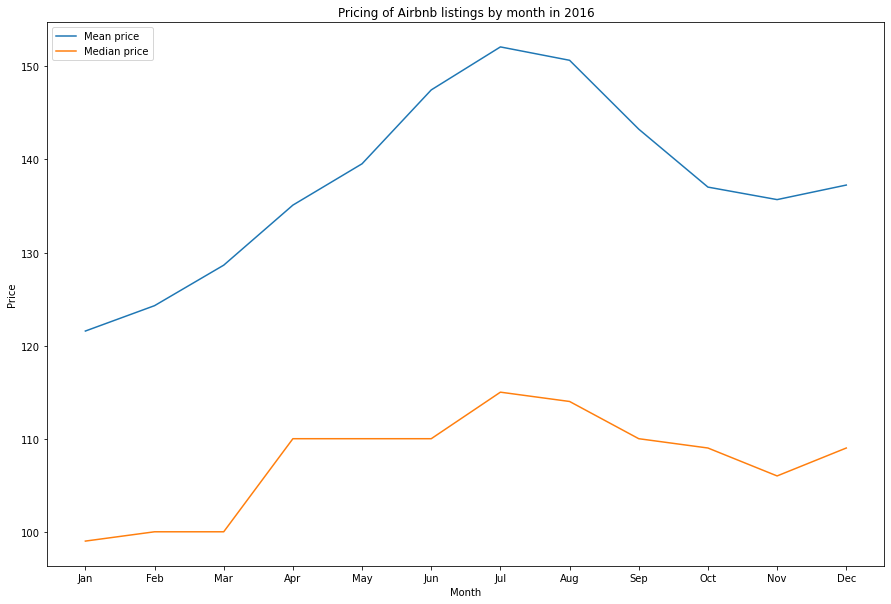

In [18]:
# time series plot for pricing
fig = plt.figure(figsize =(15, 10))
sb.lineplot(x="month", y="mean_price", data=dfc_price, label = 'Mean price')
sb.lineplot(x="month", y="median_price", data=dfc_price, label = 'Median price')
plt.title('Pricing of Airbnb listings by month in 2016')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc = "upper left")
# plt.xlim(0,800)
plt.show()

# Question 2: Top 5 neighborhoods which were the most expensive and the most affordable in Seattle?

In [19]:
dfl = df_l[['host_id','neighbourhood_cleansed','neighbourhood_group_cleansed','price']]
dfl

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,price
0,956883,West Queen Anne,Queen Anne,$85.00
1,5177328,West Queen Anne,Queen Anne,$150.00
2,16708587,West Queen Anne,Queen Anne,$975.00
3,9851441,West Queen Anne,Queen Anne,$100.00
4,1452570,West Queen Anne,Queen Anne,$450.00
...,...,...,...,...
3813,31148752,Fremont,Other neighborhoods,$359.00
3814,46566046,Portage Bay,Capitol Hill,$79.00
3815,52791370,Rainier Beach,Rainier Valley,$93.00
3816,25522052,Madison Park,Capitol Hill,$99.00


In [20]:
# Convert "Price" datatype to numeric and remove Null value
dfl = dfl[dfl['price'].notna()]

dfl['price'] = dfl['price'].replace('[\$\,\.]', '', regex=True).astype(float)/100

In [21]:
dfl

,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,price
0,956883,West Queen Anne,Queen Anne,85.0
1,5177328,West Queen Anne,Queen Anne,150.0
2,16708587,West Queen Anne,Queen Anne,975.0
3,9851441,West Queen Anne,Queen Anne,100.0
4,1452570,West Queen Anne,Queen Anne,450.0
...,...,...,...,...
3813,31148752,Fremont,Other neighborhoods,359.0
3814,46566046,Portage Bay,Capitol Hill,79.0
3815,52791370,Rainier Beach,Rainier Valley,93.0
3816,25522052,Madison Park,Capitol Hill,99.0


In [22]:
dfl_price = dfl.groupby(['neighbourhood_cleansed']).agg({'price':['mean', 'median']}).reset_index()
dfl_price

neighbourhood_cleansed       price       
                                 mean median
0                   Adams  121.671429   99.5
1                    Alki  171.619048  126.5
2           Arbor Heights  126.800000  100.0
3                Atlantic  111.396226   95.0
4                Belltown  162.893162  139.0
..                    ...         ...    ...
82          West Woodland  124.343750   95.0
83               Westlake  194.470588  150.0
84       Whittier Heights  128.653846  110.0
85             Windermere  169.900000  127.5
86         Yesler Terrace  116.235294  112.0

[87 rows x 3 columns]

In [23]:
dfl_price.columns = dfl_price.columns.droplevel(1)
dfl_price.columns = ['neighbourhood_cleansed', 'mean_price', 'median_price']
dfl_price

,neighbourhood_cleansed,mean_price,median_price
0,Adams,121.671429,99.5
1,Alki,171.619048,126.5
2,Arbor Heights,126.800000,100.0
3,Atlantic,111.396226,95.0
4,Belltown,162.893162,139.0
...,...,...,...
82,West Woodland,124.343750,95.0
83,Westlake,194.470588,150.0
84,Whittier Heights,128.653846,110.0
85,Windermere,169.900000,127.5


In [24]:
top_expensive = dfl_price.sort_values(by=['mean_price'], ascending=False).head(5)
top_expensive

,neighbourhood_cleansed,mean_price,median_price
73,Southeast Magnolia,231.705882,150.0
61,Portage Bay,227.857143,132.5
83,Westlake,194.470588,150.0
81,West Queen Anne,187.769231,130.0
48,Montlake,182.789474,125.0


In [25]:
top_cheap = dfl_price.sort_values(by=['mean_price'], ascending=True).head(5)
top_cheap

,neighbourhood_cleansed,mean_price,median_price
62,Rainier Beach,68.555556,60.0
56,Olympic Hills,71.687500,55.5
70,South Delridge,74.666667,67.5
24,Georgetown,76.125000,72.5
54,North Delridge,76.375000,72.5


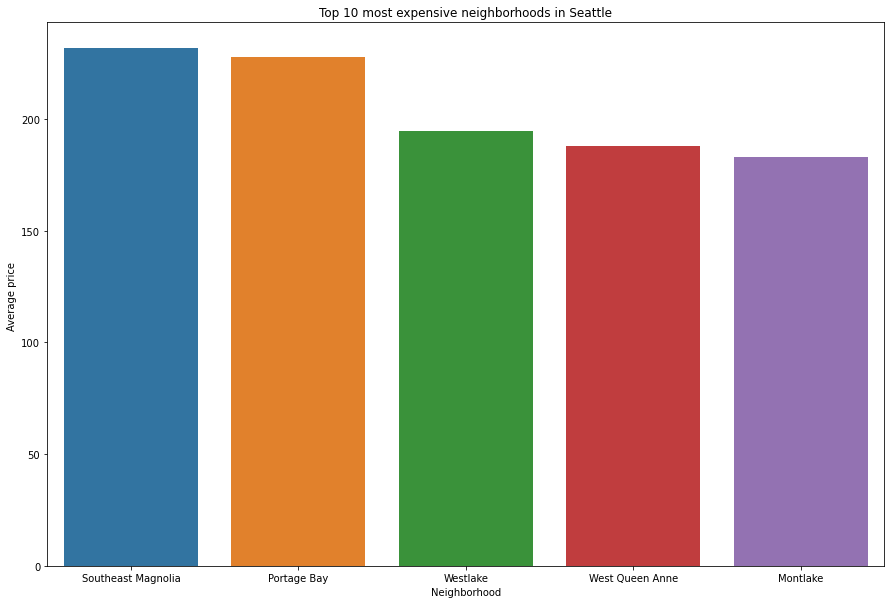

In [26]:
fig = plt.figure(figsize =(15, 10))
# sb.lineplot(x="date", y="listing_id", data=available, label = 'Available')
# sb.lineplot(x="date", y="listing_id", data=unavailable, label = 'Unavailable')
sb.barplot(x = 'neighbourhood_cleansed',y = 'mean_price',data = top_expensive)
plt.title('Top 10 most expensive neighborhoods in Seattle')
plt.xlabel('Neighborhood')
plt.ylabel('Average price ')
# plt.legend(loc = "upper left")
# plt.xlim(0,800)
plt.show()

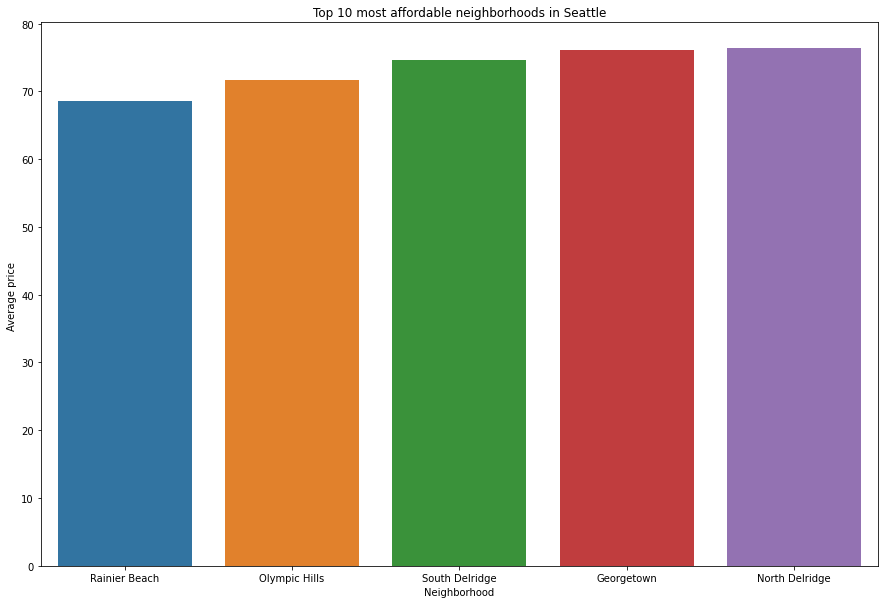

In [27]:
fig = plt.figure(figsize =(15, 10))
sb.barplot(x = 'neighbourhood_cleansed',y = 'mean_price',data = top_cheap)
plt.title('Top 10 most affordable neighborhoods in Seattle')
plt.xlabel('Neighborhood')
plt.ylabel('Average price ')
plt.show()

# Question 3: How did the number of new hosts increase by time?

In [28]:
dfl_host = df_l[['host_id','host_since']]

In [29]:
dfl_host

,host_id,host_since
0,956883,2011-08-11
1,5177328,2013-02-21
2,16708587,2014-06-12
3,9851441,2013-11-06
4,1452570,2011-11-29
...,...,...
3813,31148752,2015-04-13
3814,46566046,2015-10-14
3815,52791370,2015-12-30
3816,25522052,2015-01-03


In [30]:
dfl_host['host_since'] = pd.to_datetime(dfl_host['host_since'])
dfl_host['month'] = dfl_host['host_since'].dt.strftime('%b')
dfl_host['month_year'] = dfl_host['host_since'].dt.strftime('%b-%Y')
dfl_host

/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,host_id,host_since,month,month_year
0,956883,2011-08-11,Aug,Aug-2011
1,5177328,2013-02-21,Feb,Feb-2013
2,16708587,2014-06-12,Jun,Jun-2014
3,9851441,2013-11-06,Nov,Nov-2013
4,1452570,2011-11-29,Nov,Nov-2011
...,...,...,...,...
3813,31148752,2015-04-13,Apr,Apr-2015
3814,46566046,2015-10-14,Oct,Oct-2015
3815,52791370,2015-12-30,Dec,Dec-2015
3816,25522052,2015-01-03,Jan,Jan-2015


In [31]:
dfl_newhost = dfl_host.groupby(['host_since']).agg({'host_id':'nunique'}).reset_index()
dfl_newhost

,host_since,host_id
0,2008-11-10,1
1,2009-01-08,1
2,2009-02-16,1
3,2009-03-03,1
4,2009-03-30,1
...,...,...
1375,2015-12-29,1
1376,2015-12-30,1
1377,2016-01-01,1
1378,2016-01-02,2


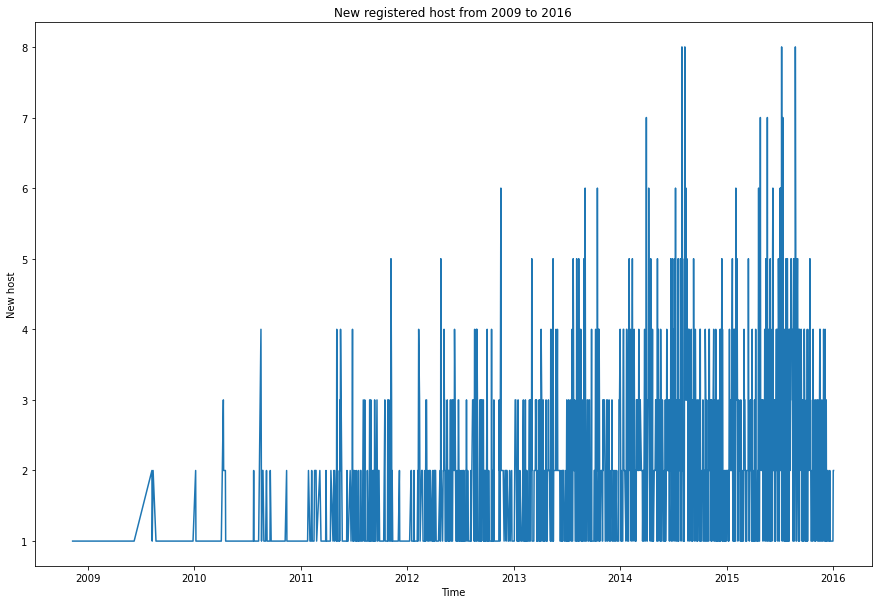

In [32]:
# time series plot 
fig = plt.figure(figsize =(15, 10))
sb.lineplot(x="host_since", y="host_id", data=dfl_newhost)
plt.title('New registered host from 2009 to 2016')
plt.xlabel('Time')
plt.ylabel('New host')
plt.show()

In [33]:
dfl_newhost['cumsum_host_id'] = dfl_newhost['host_id'].cumsum()
dfl_newhost

,host_since,host_id,cumsum_host_id
0,2008-11-10,1,1
1,2009-01-08,1,2
2,2009-02-16,1,3
3,2009-03-03,1,4
4,2009-03-30,1,5
...,...,...,...
1375,2015-12-29,1,2743
1376,2015-12-30,1,2744
1377,2016-01-01,1,2745
1378,2016-01-02,2,2747


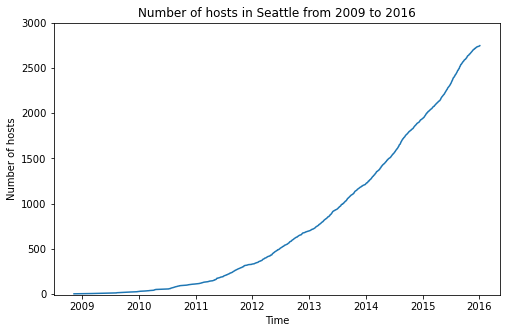

In [34]:
# time series plot
fig = plt.figure(figsize = (8, 5))
sb.lineplot(x="host_since", y="cumsum_host_id", data=dfl_newhost)
plt.title('Number of hosts in Seattle from 2009 to 2016')
plt.ylabel('Number of hosts')
plt.xlabel('Time')
plt.ylim(-10,3000)
plt.show()